# **Practical 12**
## Name: Snehal Rakas
## Batch: A1
## Roll no: 12

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv("/content/suv_data.csv")
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
print(df.tail())

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [ ]:
df.shape

(400, 5)

In [ ]:
df.groupby('Purchased').size()

,0
Purchased,
0,257
1,143


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 640x480 with 0 Axes>

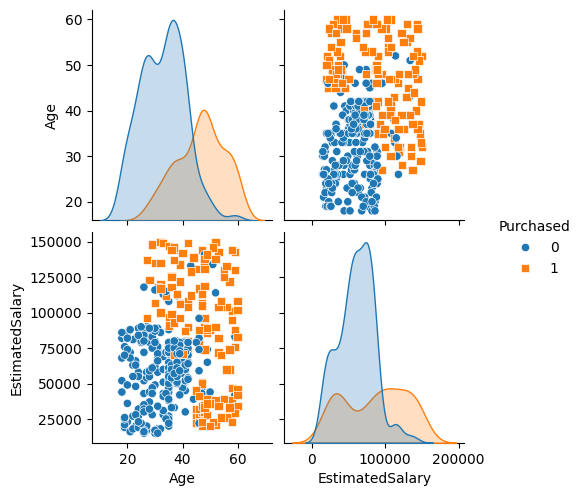

In [ ]:
plt.figure()
sns.pairplot(df.drop("User ID", axis = 1), hue = "Purchased", markers = ["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

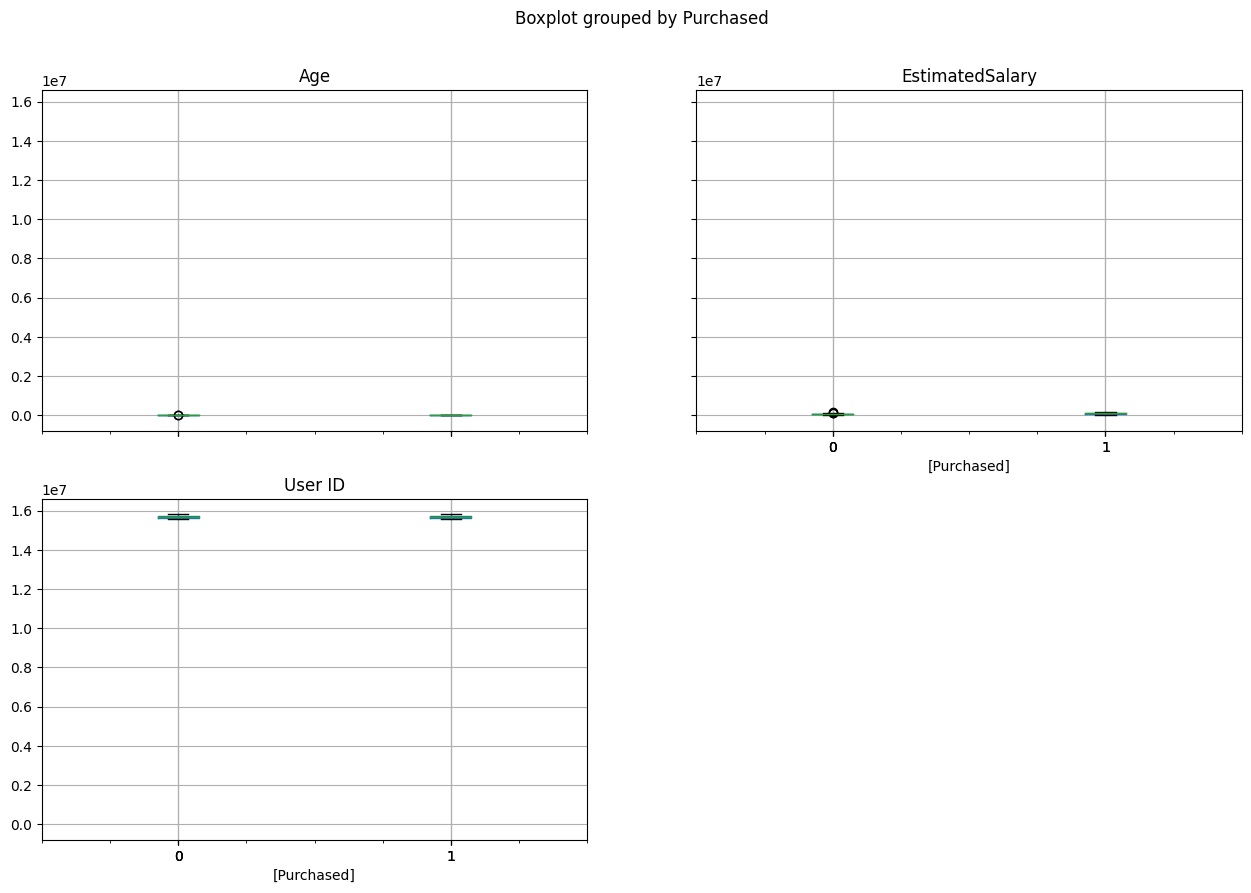

In [ ]:
plt.figure()
df.boxplot(by = "Purchased", figsize=(15,10))
plt.show()

In [ ]:
#Create feature and target arrays
X = df.drop(['User ID', 'Purchased'], axis = 'columns')

# y=df.Purchased
y=df.drop(['User ID', 'Gender', 'Age', 'EstimatedSalary'], axis = 'columns')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320, 1) (80, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Identify the categorical columns in your dataset
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply label encoding to the categorical columns in both train and test data
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Use the same transformation for X_test

# Now fit the KNN model again
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Apply One-Hot Encoding to both X_train and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Now fit the KNN model again
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train = label_encoder.fit_transform(y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np

def predict_purchase():
    try:
        # Taking inputs from the user
        Gender = float(input("Gender (0 for Female, 1 for Male): "))  # Use appropriate input type if Gender is numeric
        Age = float(input("Age: "))
        EstimatedSalary = float(input("EstimatedSalary: "))

        # Creating a numpy array for the input
        user_input = np.array([Gender, Age, EstimatedSalary]).reshape(1, -1)  # Reshape for single sample prediction

        # Making prediction using the classifier (assuming classifier is already defined)
        prediction = classifier.predict(user_input)  # Use the 'classifier' variable

        # Mapping the prediction (usually encoded as 0,1 representing 'Not Purchased' or 'Purchased')
        purchase_map = {0: 'Not Purchased', 1: 'Purchased'}
        predicted_result = purchase_map[prediction[0]]

        # Display the result to the user
        print(f"Prediction: Expected '{predicted_result}'.")

    except ValueError:
        print("Invalid input. Please enter valid numeric values for each feature.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming classifier is already defined and fitted
predict_purchase()


Gender (0 for Female, 1 for Male): 0
Age: 46
EstimatedSalary: 41000
Prediction: Expected 'Not Purchased'.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
